
# Time Series

A time series is a sequence of data points collected at specific time intervals. In other words, it's a dataset where each data point is associated with a particular timestamp or time period. Time series data is used to observe how a variable changes over time and to identify patterns, trends, and fluctuations in that variable. This type of data is commonly encountered in various fields such as economics, finance, physics, biology, weather forecasting, and more.

Time series data can be univariate or multivariate. Univariate time series involves a single variable measured over time, while multivariate time series involves multiple variables measured over the same time intervals. The primary goal when analyzing time series data is often to forecast future values based on the patterns observed in the historical data.

Some common examples of time series data include:

1. **Stock Prices**: Daily closing prices of a company's stock over a period of time.
2. **Weather Data**: Daily temperature readings recorded at a specific location.
3. **Economic Indicators**: Monthly unemployment rates over several years.
4. **Web Traffic**: Hourly website visitors over a week.
5. **Sensor Readings**: Time-stamped measurements from sensors in industrial processes.
6. **Healthcare Data**: Daily patient admissions to a hospital.
7. **Social Media Activity**: Hourly tweet counts related to a specific topic.

Analyzing time series data involves various techniques, including:

1. **Descriptive Analysis**: Identifying trends, seasonality, and anomalies in the data.
2. **Forecasting**: Using historical patterns to predict future values of the time series.
3. **Smoothing**: Applying techniques to remove noise and highlight underlying trends.
4. **Decomposition**: Separating a time series into its trend, seasonality, and residual components.
5. **Statistical Models**: Utilizing techniques like ARIMA (AutoRegressive Integrated Moving Average) for forecasting.
6. **Machine Learning**: Employing algorithms like recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks for more complex analyses.

Time series analysis plays a crucial role in making informed decisions, predicting outcomes, and understanding the behavior of various phenomena that evolve over time.

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
#loading the time series data
data = pd.read_csv(r'C:\Users\Dell\Desktop\New folder (2)\New folder (3)\AirPassengers.csv')

In [4]:
#EDA on the time series data
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
data['Month'] = pd.to_datetime(data['Month'])  #converting month column str to datetime
data.index = data['Month'] #making month column as a index column
del data['Month']

In [8]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

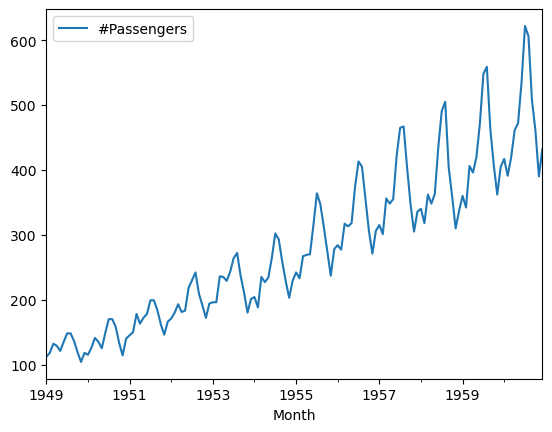

In [9]:
#plotting the time series
data.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

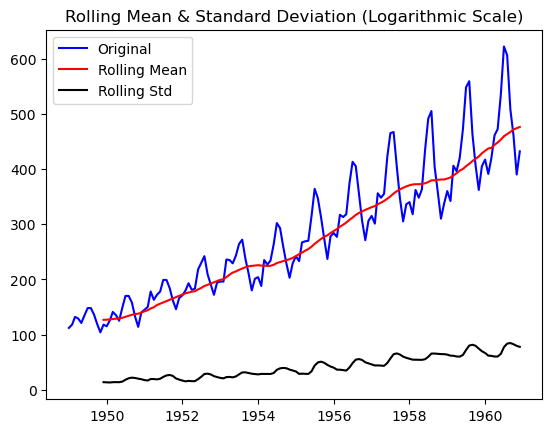

In [10]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [11]:
mean_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [12]:
std_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


In [17]:
#checking the stationarity of the series
#adfuller test if checking the data is stationarity or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result[1])

0.9918802434376411


In [15]:
p_value=result[1]
p_value

0.9918802434376411

In [16]:
#iterpret the p value
if p_value <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

NO Stationarity is present


<Axes: xlabel='Month'>

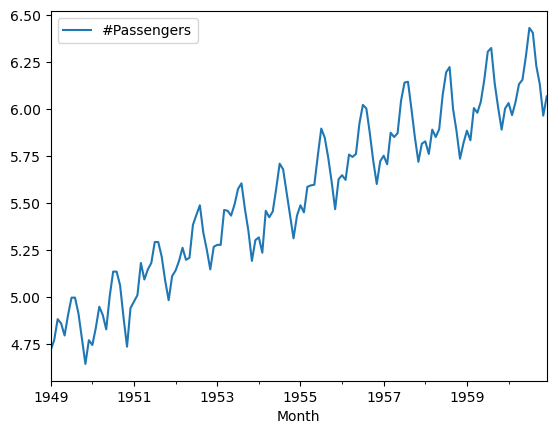

In [19]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

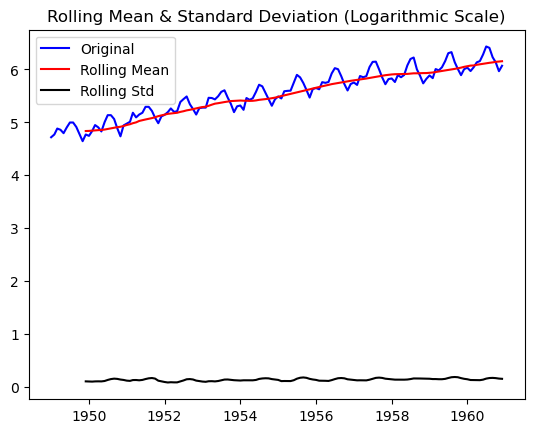

In [20]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [21]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [22]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result)

(-3.1629079913008766, 0.02223463000124264, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

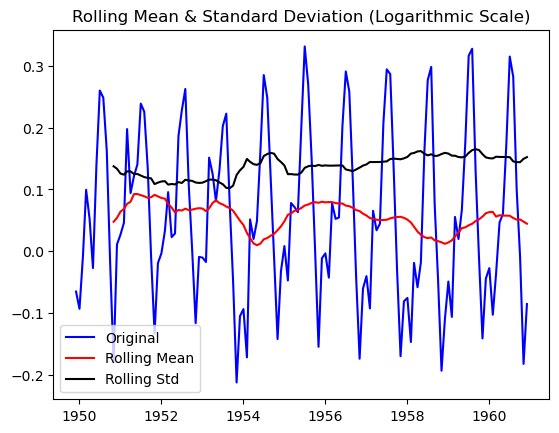

In [23]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [24]:
result = adfuller(new_data['#Passengers'])
print(result)

(-3.1629079913008766, 0.02223463000124264, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


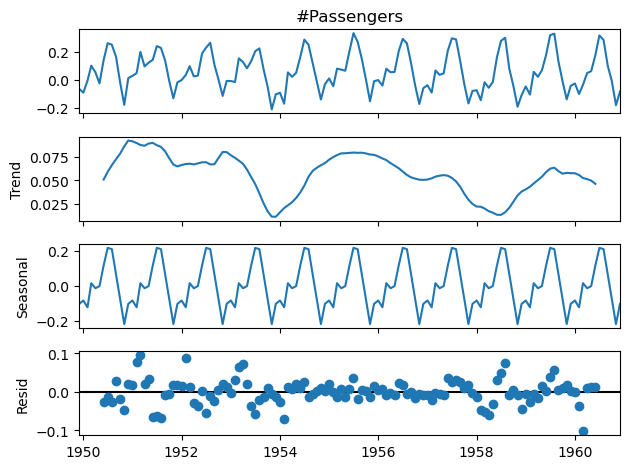

In [27]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot();

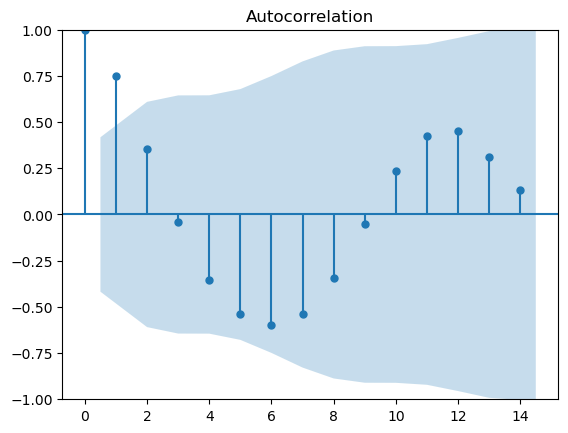

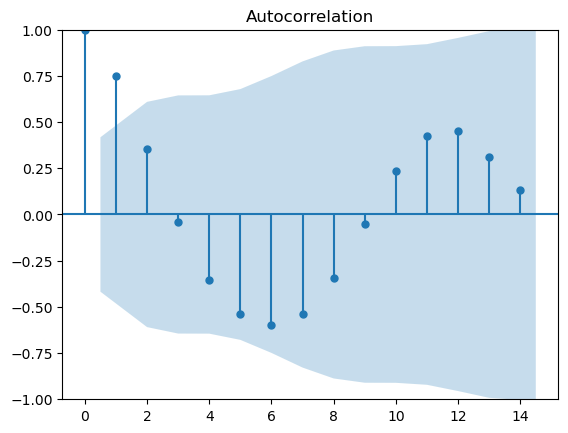

In [30]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data)
pacf_plot=pacf(new_data)
plot_acf(acf_plot)
#plot_pacf(pacf_plot)

In [38]:
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
model_fit.summary()

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.901
Date:                Sat, 19 Aug 2023   AIC                           -225.803
Time:                        17:41:51   BIC                           -211.865
Sample:                    12-01-1949   HQIC                          -220.143
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.022      2.446      0.014       0.011       0.097
ar.L1          0.4323      0.318      1.361      0.173      -0.190       1.055
ma.L1          0.5917      0.323      1.829      0.067      -0.042       1.226
ma.L2         -0.0778      0.279     -0.279      0.780      -0.625       0.469
sigma2         0.0081      0.002      4.769      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.02
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.55   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

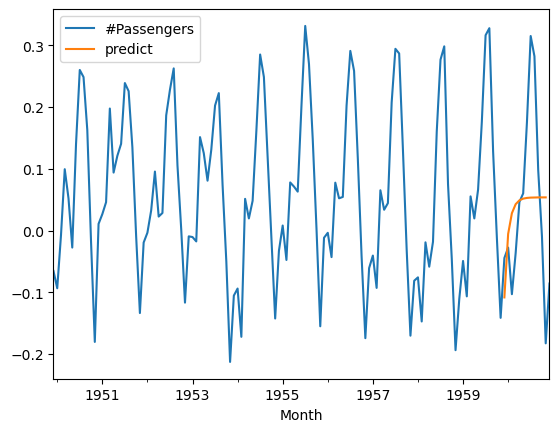

In [39]:
new_data['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_data[['#Passengers','predict']].plot()

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

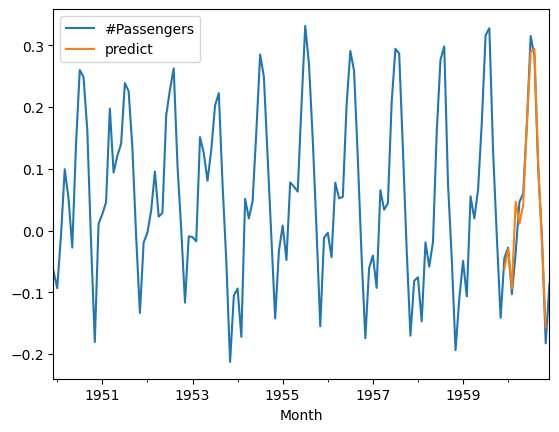

In [41]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

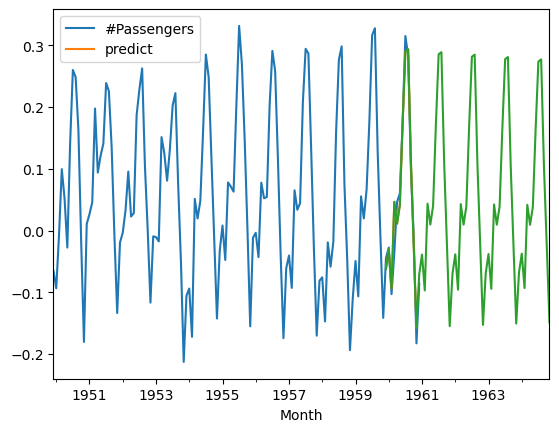

In [42]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=60)
new_data.plot()
forecast.plot()